In [1]:
#!/usr/bin/python
#import wradlib as wrl
import pylab as pl
from glob import glob
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

import csv
import os
import datetime
import pandas as pd

#shapefile: GIS vector data format (ESRI)
import shapefile as shp  # Requires the pyshp package
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import ticker
import netCDF4 as nc4
from datetime import date,timedelta
import plotly.graph_objs as go
import matplotlib.lines as mlines
import seaborn as sns
import shapely
from geopandas.tools import sjoin

import importlib
import geopandas as gpd
import xarray as xr
import cartopy.crs as ccrs  # Projections list

import _pickle as pickle

#import external functions (need pip install ipynb)
import ipynb.fs.full.HaileventsFunctions as HF

## Comparison between full filter and contribution of each singular parameter to filtering:

In [2]:
#Folder address containing data:
fold = '/home/ciccuz/phd/KIT/hail_data/'
plt_fold = '/home/ciccuz/phd/KIT/scripts/plots/OT_filt-nonfilt_comparison_fullSet'

In [3]:
# must run the bash command: sshfs -p22 giordano@imk-tss-risk:/hail4/punge/ ./hail4_punge/

#With geopandas: NEW VERSION!
sfg_ita = gpd.read_file(fold + "hail4_punge/geodata/ITA_adm/ITA_adm0.shp", encoding='latin-1')
sfg_deu = gpd.read_file(fold + "hail4_punge/geodata/DEU_adm/DEU_adm0.shp", encoding='latin-1')
sfg_aut = gpd.read_file(fold + "hail4_punge/geodata/AUT_adm/AUT_adm0.shp", encoding='latin-1')
sfg_che = gpd.read_file(fold + "hail4_punge/geodata/CHE_adm/CHE_adm0.shp", encoding='latin-1')
sfg_cro = gpd.read_file(fold + "hail4_punge/geodata/Croatia/mj788hg8036.shp", encoding='latin-1')
sfg_slo = gpd.read_file(fold + "hail4_punge/geodata/Slovenia/gk259nt7452.shp", encoding='latin-1')
sfg_hun = gpd.read_file(fold + "hail4_punge/geodata/Hungary/qh513vs8921.shp", encoding='latin-1')
sfg_alg = gpd.read_file(fold + "hail4_punge/geodata/algeria/rt767cn2098.shp", encoding='latin-1')
sfg_tun = gpd.read_file(fold + "hail4_punge/geodata/tunisia/TUN_adm0.shp", encoding='latin-1')
sfg_bos = gpd.read_file(fold + "hail4_punge/geodata/bosnia/bt512fj0408.shp", encoding='latin-1')
sfg_fra = gpd.read_file(fold + "hail4_punge/geodata/france/dw125xh0996.shp", encoding='latin-1')
sfg_mon = gpd.read_file(fold + "hail4_punge/geodata/montenegro/MNE_adm0.shp", encoding='latin-1')
sfg_cze = gpd.read_file(fold + "hail4_punge/geodata/czech/CZE_adm0.shp", encoding='latin-1')
sfg_svk = gpd.read_file(fold + "hail4_punge/geodata/slovakia/SVK_adm0.shp", encoding='latin-1')


#lat/lon coords to cover the whole SPHERA domain:
lonmin=6; lonmax=19; latmin=35; latmax=49
latplot=[latmin,latmax]; lonplot=[lonmin,lonmax]

#maps limits whole SPHERA domain
x_lim=lonplot
y_lim=latplot


#shapefile in vector form for considering multiple geographic shapefiles
sf_geo = [sfg_ita, sfg_aut, sfg_deu, sfg_che, sfg_cro, sfg_slo, sfg_hun, sfg_alg, sfg_tun, sfg_fra, sfg_bos,
          sfg_mon, sfg_cze, sfg_svk]

sfg_land = gpd.read_file(fold + "hail4_punge/geodata/Land/ne_10m_land.shp", encoding='latin-1')

hhmin=0; hhmax=23

#Read and store cities and their features to be used in the maps:
clonsel, clatsel, csizesel, cnamesel, ckindsel = HF.HF_cities(latmin,latmax,lonmin,lonmax)

In [4]:
#LIST OF DAYS WITH JULIAN DAY AND DATETIME FORMAT:

#days in 2016: 214 days (actually 211 because the following days are missing: 2016185,2016186,2016201 )
days_2016 = [2016092,2016093,2016094,2016095,2016096,2016097,2016098,2016099,2016100,2016101,2016102,2016103,2016104,
        2016105,2016106,2016107,2016108,2016109,2016110,2016111,2016112,2016113,2016114,2016115,2016116,2016117,
        2016118,2016119,2016120,2016121,2016122,2016123,2016124,2016125,2016126,2016127,2016128,2016129,2016130,
        2016131,2016132,2016133,2016134,2016135,2016136,2016137,2016138,2016139,2016140,2016141,2016142,2016143,
        2016144,2016145,2016146,2016147,2016148,2016149,2016150,2016151,2016152,2016153,2016154,2016155,2016156,
        2016157,2016158,2016159,2016160,2016161,2016162,2016163,2016164,2016165,2016166,2016167,2016168,2016169,
        2016170,2016171,2016172,2016173,2016174,2016175,2016176,2016177,2016178,2016179,2016180,2016181,2016182,
        2016183,2016184,2016185,2016186,2016187,2016188,2016189,2016190,2016191,2016192,2016193,2016194,2016195,
        2016196,2016197,2016198,2016199,2016200,2016201,2016202,2016203,2016204,2016205,2016206,2016207,2016208,
        2016209,2016210,2016211,2016212,2016213,2016214,2016215,2016216,2016217,2016218,2016219,2016220,2016221,
        2016222,2016223,2016224,2016225,2016226,2016227,2016228,2016229,2016230,2016231,2016232,2016233,2016234,
        2016235,2016236,2016237,2016238,2016239,2016240,2016241,2016242,2016243,2016244,2016245,2016246,2016247,
        2016248,2016249,2016250,2016251,2016252,2016253,2016254,2016255,2016256,2016257,2016258,2016259,2016260,
        2016261,2016262,2016263,2016264,2016265,2016266,2016267,2016268,2016269,2016270,2016271,2016272,2016273,
        2016274,2016275,2016276,2016277,2016278,2016279,2016280,2016281,2016282,2016283,2016284,2016285,2016286,
        2016287,2016288,2016289,2016290,2016291,2016292,2016293,2016294,2016295,2016296,2016297,2016298,2016299,
        2016300,2016301,2016302,2016303,2016304,2016305]

#days in 2017: missing 1 april (2017091), 213 days
days_2017 = [2017091,2017092,2017093,2017094,2017095,2017096,2017097,2017098,2017099,2017100,2017101,2017102,2017103,2017104,
        2017105,2017106,2017107,2017108,2017109,2017110,2017111,2017112,2017113,2017114,2017115,2017116,2017117,
        2017118,2017119,2017120,2017121,2017122,2017123,2017124,2017125,2017126,2017127,2017128,2017129,2017130,
        2017131,2017132,2017133,2017134,2017135,2017136,2017137,2017138,2017139,2017140,2017141,2017142,2017143,
        2017144,2017145,2017146,2017147,2017148,2017149,2017150,2017151,2017152,2017153,2017154,2017155,2017156,
        2017157,2017158,2017159,2017160,2017161,2017162,2017163,2017164,2017165,2017166,2017167,2017168,2017169,
        2017170,2017171,2017172,2017173,2017174,2017175,2017176,2017177,2017178,2017179,2017180,2017181,2017182,
        2017183,2017184,2017185,2017186,2017187,2017188,2017189,2017190,2017191,2017192,2017193,2017194,2017195,
        2017196,2017197,2017198,2017199,2017200,2017201,2017202,2017203,2017204,2017205,2017206,2017207,2017208,
        2017209,2017210,2017211,2017212,2017213,2017214,2017215,2017216,2017217,2017218,2017219,2017220,2017221,
        2017222,2017223,2017224,2017225,2017226,2017227,2017228,2017229,2017230,2017231,2017232,2017233,2017234,
        2017235,2017236,2017237,2017238,2017239,2017240,2017241,2017242,2017243,2017244,2017245,2017246,2017247,
        2017248,2017249,2017250,2017251,2017252,2017253,2017254,2017255,2017256,2017257,2017258,2017259,2017260,
        2017261,2017262,2017263,2017264,2017265,2017266,2017267,2017268,2017269,2017270,2017271,2017272,2017273,
        2017274,2017275,2017276,2017277,2017278,2017279,2017280,2017281,2017282,2017283,2017284,2017285,2017286,
        2017287,2017288,2017289,2017290,2017291,2017292,2017293,2017294,2017295,2017296,2017297,2017298,2017299,
        2017300,2017301,2017302,2017303,2017304]

#days in 2018: missing 1 april (2018091) and 17 june (2018168), 212 days
days_2018 = [2018091,2018092,2018093,2018094,2018095,2018096,2018097,2018098,2018099,2018100,2018101,2018102,2018103,2018104,
        2018105,2018106,2018107,2018108,2018109,2018110,2018111,2018112,2018113,2018114,2018115,2018116,2018117,
        2018118,2018119,2018120,2018121,2018122,2018123,2018124,2018125,2018126,2018127,2018128,2018129,2018130,
        2018131,2018132,2018133,2018134,2018135,2018136,2018137,2018138,2018139,2018140,2018141,2018142,2018143,
        2018144,2018145,2018146,2018147,2018148,2018149,2018150,2018151,2018152,2018153,2018154,2018155,2018156,
        2018157,2018158,2018159,2018160,2018161,2018162,2018163,2018164,2018165,2018166,2018167,2018168,2018169,
        2018170,2018171,2018172,2018173,2018174,2018175,2018176,2018177,2018178,2018179,2018180,2018181,2018182,
        2018183,2018184,2018185,2018186,2018187,2018188,2018189,2018190,2018191,2018192,2018193,2018194,2018195,
        2018196,2018197,2018198,2018199,2018200,2018201,2018202,2018203,2018204,2018205,2018206,2018207,2018208,
        2018209,2018210,2018211,2018212,2018213,2018214,2018215,2018216,2018217,2018218,2018219,2018220,2018221,
        2018222,2018223,2018224,2018225,2018226,2018227,2018228,2018229,2018230,2018231,2018232,2018233,2018234,
        2018235,2018236,2018237,2018238,2018239,2018240,2018241,2018242,2018243,2018244,2018245,2018246,2018247,
        2018248,2018249,2018250,2018251,2018252,2018253,2018254,2018255,2018256,2018257,2018258,2018259,2018260,
        2018261,2018262,2018263,2018264,2018265,2018266,2018267,2018268,2018269,2018270,2018271,2018272,2018273,
        2018274,2018275,2018276,2018277,2018278,2018279,2018280,2018281,2018282,2018283,2018284,2018285,2018286,
        2018287,2018288,2018289,2018290,2018291,2018292,2018293,2018294,2018295,2018296,2018297,2018298,2018299,
        2018300,2018301,2018302,2018303,2018304]

In [5]:
#write dataframes storing julian days and datetimes of OT days:

days_2016_df =pd.DataFrame(index=np.arange(0,len(days_2016),1), columns=['day','dtime'])
days_2017_df =pd.DataFrame(index=np.arange(0,len(days_2017),1), columns=['day','dtime'])
days_2018_df =pd.DataFrame(index=np.arange(0,len(days_2018),1), columns=['day','dtime'])

for day,ind in zip(days_2016,np.arange(0,len(days_2016),1)):
    
    dtime = datetime.datetime.strptime('2016-04-01','%Y-%m-%d') + timedelta(days=int(ind)) 
    
    days_2016_df.iloc[ind]['day'] = day
    days_2016_df.iloc[ind]['dtime'] = dtime    

for day,ind in zip(days_2017,np.arange(0,len(days_2017),1)):
    
    dtime = datetime.datetime.strptime('2017-04-01','%Y-%m-%d') + timedelta(days=int(ind)) 
    
    days_2017_df.iloc[ind]['day'] = day
    days_2017_df.iloc[ind]['dtime'] = dtime    
    
for day,ind in zip(days_2018,np.arange(0,len(days_2018),1)):
    
    dtime = datetime.datetime.strptime('2018-04-01','%Y-%m-%d') + timedelta(days=int(ind)) 
    
    days_2018_df.iloc[ind]['day'] = day
    days_2018_df.iloc[ind]['dtime'] = dtime    

days_2016_df.dtime = pd.to_datetime(days_2016_df.dtime)
days_2017_df.dtime = pd.to_datetime(days_2017_df.dtime)
days_2018_df.dtime = pd.to_datetime(days_2018_df.dtime)

#REMOVE MISSING DAYS (after creating dataframes otherwise day and dtime are shifted and wrong!!!)

#-2016: 2016185,2016186,2016201
days_2016_df = days_2016_df[(days_2016_df.day !=2016185) & (days_2016_df.day !=2016186) & 
                            (days_2016_df.day !=2016201)]
#-2017: 2017091 
days_2017_df = days_2017_df[days_2017_df.day != 2017091]

#-2018: 2018091, 2018168
days_2018_df = days_2018_df[(days_2018_df.day != 2018091)  & (days_2018_df.day != 2018093) & 
                            (days_2018_df.day != 2018168)]

### - Fully filtered and unfiltered dataset

In [6]:
OT_2016 = dict()

for d_ind in days_2016_df.index:
    
    day = days_2016_df['day'][d_ind]
    dtime = days_2016_df['dtime'][d_ind]
    
    with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh/{dtime.year}/OTfilt_{day}.txt', "rb") as file:  
         OT_dict = pickle.load(file)
            
    OT_2016[day] = OT_dict
    
OT_2017 = dict()

for d_ind in days_2017_df.index:
    
    day = days_2017_df['day'][d_ind]
    dtime = days_2017_df['dtime'][d_ind]
    
    with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh/{dtime.year}/OTfilt_{day}.txt', "rb") as file:  
         OT_dict = pickle.load(file)
            
    OT_2017[day] = OT_dict
    
OT_2018 = dict()

for d_ind in days_2018_df.index:
    
    day = days_2018_df['day'][d_ind]
    dtime = days_2018_df['dtime'][d_ind]

    with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh/{dtime.year}/OTfilt_{day}.txt', "rb") as file:  
         OT_dict = pickle.load(file)
            
    OT_2018[day] = OT_dict

In [7]:
#extract the full sets of all OTs and filtered OTs considering the whole sample of events

all_OTset_2016 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2016 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])

for d_ind in days_2016_df.index:
    
    day = days_2016_df['day'][d_ind]
    
    OTday_hours = OT_2016[day]['ORIGINAL_OTs'].keys()
    
    for hour in OTday_hours:
        
        all_OTset_2016 = all_OTset_2016.append(OT_2016[day]['ORIGINAL_OTs'][hour].reset_index(drop=True))
        filt_OTset_2016 = filt_OTset_2016.append(OT_2016[day]['FILTERED_OTs'][hour].reset_index(drop=True))

all_OTset_2016 = all_OTset_2016.reset_index(drop=True)
filt_OTset_2016 = filt_OTset_2016.reset_index(drop=True) 

#select the set of removed OTs with filtering:
remv_OTset_2016 = all_OTset_2016.merge(filt_OTset_2016, how='left', indicator=True)
remv_OTset_2016 = remv_OTset_2016[remv_OTset_2016['_merge']=='left_only'].drop(columns=['_merge'])

#select OTs only over LAND:
all_OTset_2016_land = gpd.clip(all_OTset_2016, sfg_land).sort_index()
filt_OTset_2016_land = gpd.clip(filt_OTset_2016, sfg_land).sort_index()
remv_OTset_2016_land = gpd.clip(remv_OTset_2016, sfg_land).sort_index()

In [8]:
#extract the full sets of all OTs and filtered OTs considering the whole sample of events

all_OTset_2017 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2017 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])

for d_ind in days_2017_df.index:
    
    day = days_2017_df['day'][d_ind]
    
    OTday_hours = OT_2017[day]['ORIGINAL_OTs'].keys()
    
    for hour in OTday_hours:
        
        all_OTset_2017 = all_OTset_2017.append(OT_2017[day]['ORIGINAL_OTs'][hour].reset_index(drop=True))
        filt_OTset_2017 = filt_OTset_2017.append(OT_2017[day]['FILTERED_OTs'][hour].reset_index(drop=True))

all_OTset_2017 = all_OTset_2017.reset_index(drop=True)
filt_OTset_2017 = filt_OTset_2017.reset_index(drop=True) 

#select the set of removed OTs with filtering:
remv_OTset_2017 = all_OTset_2017.merge(filt_OTset_2017, how='left', indicator=True)
remv_OTset_2017 = remv_OTset_2017[remv_OTset_2017['_merge']=='left_only'].drop(columns=['_merge'])

#select OTs only over LAND:
all_OTset_2017_land = gpd.clip(all_OTset_2017, sfg_land).sort_index()
filt_OTset_2017_land = gpd.clip(filt_OTset_2017, sfg_land).sort_index()
remv_OTset_2017_land = gpd.clip(remv_OTset_2017, sfg_land).sort_index()

In [9]:
#extract the full sets of all OTs and filtered OTs considering the whole sample of events

all_OTset_2018 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2018 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])

for d_ind in days_2018_df.index:
    
    day = days_2018_df['day'][d_ind]
    
    OTday_hours = OT_2018[day]['ORIGINAL_OTs'].keys()
    
    for hour in OTday_hours:
        
        all_OTset_2018 = all_OTset_2018.append(OT_2018[day]['ORIGINAL_OTs'][hour].reset_index(drop=True))
        filt_OTset_2018 = filt_OTset_2018.append(OT_2018[day]['FILTERED_OTs'][hour].reset_index(drop=True))

all_OTset_2018 = all_OTset_2018.reset_index(drop=True)
filt_OTset_2018 = filt_OTset_2018.reset_index(drop=True) 

#select the set of removed OTs with filtering:
remv_OTset_2018 = all_OTset_2018.merge(filt_OTset_2018, how='left', indicator=True)
remv_OTset_2018 = remv_OTset_2018[remv_OTset_2018['_merge']=='left_only'].drop(columns=['_merge'])

#select OTs only over LAND:
all_OTset_2018_land = gpd.clip(all_OTset_2018, sfg_land).sort_index()
filt_OTset_2018_land = gpd.clip(filt_OTset_2018, sfg_land).sort_index()
remv_OTset_2018_land = gpd.clip(remv_OTset_2018, sfg_land).sort_index()

In [10]:
#Join the three years together:
all_OTset_2016_2017_2018 = pd.concat([all_OTset_2016, all_OTset_2017, all_OTset_2018])
filt_OTset_2016_2017_2018 = pd.concat([filt_OTset_2016, filt_OTset_2017, filt_OTset_2018])
remv_OTset_2016_2017_2018 = pd.concat([remv_OTset_2016, remv_OTset_2017, remv_OTset_2018])

all_OTset_2016_2017_2018_land = gpd.clip(all_OTset_2016_2017_2018, sfg_land).sort_index()
filt_OTset_2016_2017_2018_land = gpd.clip(filt_OTset_2016_2017_2018, sfg_land).sort_index()
remv_OTset_2016_2017_2018_land = gpd.clip(remv_OTset_2016_2017_2018, sfg_land).sort_index()

### - Single parameters filtering OT sets:

### Some OT data are missing in all OT set used before (not the one obtained now together with CAPE filtering (741 Ots missing))! Why? check when other singular-params filters OT sets ready if also for them these are not present

NOTFOUND_OTs_all_OTset_2018_CAPE = all_OTset_2018_CAPE.merge(all_OTset_2018, how='left', indicator=True)
NOTFOUND_OTs_all_OTset_2018_CAPE = NOTFOUND_OTs_all_OTset_2018_CAPE[NOTFOUND_OTs_all_OTset_2018_CAPE['_merge']=='left_only'].drop(columns=['_merge'])
NOTFOUND_OTs_all_OTset_2018_CAPE

fig, ax1 = plt.subplots(1, 1, figsize=(8,8))

ax1.hist(pd.to_datetime(NOTFOUND_OTs_all_OTset_2018_CAPE.time).dt.hour, bins=np.arange(25)-0.5,
         facecolor = 'red', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax1.set_xticks(np.arange(0, 24, 3))
ax1.set_ylabel('Count', fontsize=10)
ax1.set_xlabel('Hour of the day (UTC)', fontsize=10)
#ax1.set_title('Original (UNfiltered set) - 2016', fontsize=15);
#ax1.set_ylim([0,14000])

fig, ax1 = plt.subplots(1, 1, figsize=(8,8))

ax1.hist(pd.to_datetime(NOTFOUND_OTs_all_OTset_2018_CAPE.time).dt.month, bins=np.arange(4,12,1),
         facecolor = 'red', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=8)
ax1.set_xticklabels('')
ax1.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax1.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_xlabel('Month', fontsize=10)
#ax1.set_title('Original (UNfiltered set) - 2016', fontsize=15);
#ax1.set_ylim([0,50000])

fig, ax = plt.subplots(figsize = (20,12))

plt.ylim(y_lim) #y_lim
plt.xlim(x_lim)  #x_lim

#OTs HITTING:
NOTFOUND_OTs_all_OTset_2018_CAPE.plot(ax=ax, markersize=1, column='otpmax', color='red', zorder=2)   

#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=3)

plt.legend(loc='best', fontsize=13)

### Single parameters: DLS, H0, K, SLI, CAPE

In [11]:
OT_2016_params = dict()

for d_ind in days_2016_df.index:
    
    day = days_2016_df['day'][d_ind]
    dtime = days_2016_df['dtime'][d_ind]
    
    with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh_singleParams_NEW/{dtime.year}/OTfilt_{day}.txt', "rb") as file:  
         OT_dict = pickle.load(file)
            
    OT_2016_params[day] = OT_dict
    
OT_2017_params = dict()

for d_ind in days_2017_df.index:
    
    day = days_2017_df['day'][d_ind]
    dtime = days_2017_df['dtime'][d_ind]
    
    with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh_singleParams_NEW/{dtime.year}/OTfilt_{day}.txt', "rb") as file:  
         OT_dict = pickle.load(file)
            
    OT_2017_params[day] = OT_dict
    
OT_2018_params = dict()

for d_ind in days_2018_df.index:
    
    day = days_2018_df['day'][d_ind]
    dtime = days_2018_df['dtime'][d_ind]

    with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh_singleParams_NEW/{dtime.year}/OTfilt_{day}.txt', "rb") as file:  
         OT_dict = pickle.load(file)
            
    OT_2018_params[day] = OT_dict

In [12]:
#extract the full sets of all OTs and filtered OTs considering the whole sample of events
all_OTset_2016_params = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2016_K = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2016_LI = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2016_DLS = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2016_H0 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2016_CAPE = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])

for d_ind in days_2016_df.index:
    
    day = days_2016_df['day'][d_ind]
    OTday_hours = OT_2016_params[day]['FILTERED_OTs_Kindex'].keys()
    
    for hour in OTday_hours:
        all_OTset_2016_params = all_OTset_2016_params.append(OT_2016_params[day]['ORIGINAL_OTs'][hour].reset_index(drop=True))
        filt_OTset_2016_K = filt_OTset_2016_K.append(OT_2016_params[day]['FILTERED_OTs_Kindex'][hour].reset_index(drop=True))
        filt_OTset_2016_LI = filt_OTset_2016_LI.append(OT_2016_params[day]['FILTERED_OTs_LI'][hour].reset_index(drop=True))
        filt_OTset_2016_DLS = filt_OTset_2016_DLS.append(OT_2016_params[day]['FILTERED_OTs_DLS'][hour].reset_index(drop=True))
        filt_OTset_2016_H0 = filt_OTset_2016_H0.append(OT_2016_params[day]['FILTERED_OTs_H0'][hour].reset_index(drop=True))
        filt_OTset_2016_CAPE = filt_OTset_2016_CAPE.append(OT_2016_params[day]['FILTERED_OTs_CAPE'][hour].reset_index(drop=True))

all_OTset_2016_params = all_OTset_2016_params.reset_index(drop=True) 
filt_OTset_2016_K = filt_OTset_2016_K.reset_index(drop=True) 
filt_OTset_2016_DLS = filt_OTset_2016_DLS.reset_index(drop=True) 
filt_OTset_2016_LI = filt_OTset_2016_LI.reset_index(drop=True) 
filt_OTset_2016_H0 = filt_OTset_2016_H0.reset_index(drop=True) 
filt_OTset_2016_CAPE = filt_OTset_2016_CAPE.reset_index(drop=True) 

#select OTs only over LAND:
all_OTset_2016_params_land = gpd.clip(all_OTset_2016_params, sfg_land).sort_index()
filt_OTset_2016_K_land = gpd.clip(filt_OTset_2016_K, sfg_land).sort_index()
filt_OTset_2016_LI_land = gpd.clip(filt_OTset_2016_LI, sfg_land).sort_index()
filt_OTset_2016_DLS_land = gpd.clip(filt_OTset_2016_DLS, sfg_land).sort_index()
filt_OTset_2016_H0_land = gpd.clip(filt_OTset_2016_H0, sfg_land).sort_index()
filt_OTset_2016_CAPE_land = gpd.clip(filt_OTset_2016_CAPE, sfg_land).sort_index()

In [13]:
#extract the full sets of all OTs and filtered OTs considering the whole sample of events
all_OTset_2017_params = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2017_K = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2017_LI = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2017_DLS = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2017_H0 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2017_CAPE = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])

for d_ind in days_2017_df.index:
    
    day = days_2017_df['day'][d_ind]
    OTday_hours = OT_2017_params[day]['FILTERED_OTs_Kindex'].keys()
    
    for hour in OTday_hours:
        all_OTset_2017_params = all_OTset_2017_params.append(OT_2017_params[day]['ORIGINAL_OTs'][hour].reset_index(drop=True))
        filt_OTset_2017_K = filt_OTset_2017_K.append(OT_2017_params[day]['FILTERED_OTs_Kindex'][hour].reset_index(drop=True))
        filt_OTset_2017_LI = filt_OTset_2017_LI.append(OT_2017_params[day]['FILTERED_OTs_LI'][hour].reset_index(drop=True))
        filt_OTset_2017_DLS = filt_OTset_2017_DLS.append(OT_2017_params[day]['FILTERED_OTs_DLS'][hour].reset_index(drop=True))
        filt_OTset_2017_H0 = filt_OTset_2017_H0.append(OT_2017_params[day]['FILTERED_OTs_H0'][hour].reset_index(drop=True))
        filt_OTset_2017_CAPE = filt_OTset_2017_CAPE.append(OT_2017_params[day]['FILTERED_OTs_CAPE'][hour].reset_index(drop=True))

all_OTset_2017_params = all_OTset_2017_params.reset_index(drop=True) 
filt_OTset_2017_K = filt_OTset_2017_K.reset_index(drop=True) 
filt_OTset_2017_DLS = filt_OTset_2017_DLS.reset_index(drop=True) 
filt_OTset_2017_LI = filt_OTset_2017_LI.reset_index(drop=True) 
filt_OTset_2017_H0 = filt_OTset_2017_H0.reset_index(drop=True) 
filt_OTset_2017_CAPE = filt_OTset_2017_CAPE.reset_index(drop=True) 

#select OTs only over LAND:
all_OTset_2017_params_land = gpd.clip(all_OTset_2017_params, sfg_land).sort_index()
filt_OTset_2017_K_land = gpd.clip(filt_OTset_2017_K, sfg_land).sort_index()
filt_OTset_2017_LI_land = gpd.clip(filt_OTset_2017_LI, sfg_land).sort_index()
filt_OTset_2017_DLS_land = gpd.clip(filt_OTset_2017_DLS, sfg_land).sort_index()
filt_OTset_2017_H0_land = gpd.clip(filt_OTset_2017_H0, sfg_land).sort_index()
filt_OTset_2017_CAPE_land = gpd.clip(filt_OTset_2017_CAPE, sfg_land).sort_index()

In [14]:
#extract the full sets of all OTs and filtered OTs considering the whole sample of events
all_OTset_2018_params = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2018_K = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2018_LI = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2018_DLS = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2018_H0 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2018_CAPE = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])

for d_ind in days_2018_df.index:
    
    day = days_2018_df['day'][d_ind]
    OTday_hours = OT_2018_params[day]['FILTERED_OTs_Kindex'].keys()
    
    for hour in OTday_hours:
        all_OTset_2018_params = all_OTset_2018_params.append(OT_2018_params[day]['ORIGINAL_OTs'][hour].reset_index(drop=True))
        filt_OTset_2018_K = filt_OTset_2018_K.append(OT_2018_params[day]['FILTERED_OTs_Kindex'][hour].reset_index(drop=True))
        filt_OTset_2018_LI = filt_OTset_2018_LI.append(OT_2018_params[day]['FILTERED_OTs_LI'][hour].reset_index(drop=True))
        filt_OTset_2018_DLS = filt_OTset_2018_DLS.append(OT_2018_params[day]['FILTERED_OTs_DLS'][hour].reset_index(drop=True))
        filt_OTset_2018_H0 = filt_OTset_2018_H0.append(OT_2018_params[day]['FILTERED_OTs_H0'][hour].reset_index(drop=True))
        filt_OTset_2018_CAPE = filt_OTset_2018_CAPE.append(OT_2018_params[day]['FILTERED_OTs_CAPE'][hour].reset_index(drop=True))

all_OTset_2018_params = all_OTset_2018_params.reset_index(drop=True) 
filt_OTset_2018_K = filt_OTset_2018_K.reset_index(drop=True) 
filt_OTset_2018_DLS = filt_OTset_2018_DLS.reset_index(drop=True) 
filt_OTset_2018_LI = filt_OTset_2018_LI.reset_index(drop=True) 
filt_OTset_2018_H0 = filt_OTset_2018_H0.reset_index(drop=True) 
filt_OTset_2018_CAPE = filt_OTset_2018_CAPE.reset_index(drop=True) 

#select OTs only over LAND:
all_OTset_2018_params_land = gpd.clip(all_OTset_2018_params, sfg_land).sort_index()
filt_OTset_2018_K_land = gpd.clip(filt_OTset_2018_K, sfg_land).sort_index()
filt_OTset_2018_LI_land = gpd.clip(filt_OTset_2018_LI, sfg_land).sort_index()
filt_OTset_2018_DLS_land = gpd.clip(filt_OTset_2018_DLS, sfg_land).sort_index()
filt_OTset_2018_H0_land = gpd.clip(filt_OTset_2018_H0, sfg_land).sort_index()
filt_OTset_2018_CAPE_land = gpd.clip(filt_OTset_2018_CAPE, sfg_land).sort_index()

In [15]:
#Join the three years together:
all_OTset_2016_2017_2018_params = pd.concat([all_OTset_2016_params, all_OTset_2017_params, all_OTset_2018_params])
filt_OTset_2016_2017_2018_K = pd.concat([filt_OTset_2016_K, filt_OTset_2017_K, filt_OTset_2018_K])
filt_OTset_2016_2017_2018_LI = pd.concat([filt_OTset_2016_LI, filt_OTset_2017_LI, filt_OTset_2018_LI])
filt_OTset_2016_2017_2018_DLS = pd.concat([filt_OTset_2016_DLS, filt_OTset_2017_DLS, filt_OTset_2018_DLS])
filt_OTset_2016_2017_2018_H0 = pd.concat([filt_OTset_2016_H0, filt_OTset_2017_H0, filt_OTset_2018_H0])
filt_OTset_2016_2017_2018_CAPE = pd.concat([filt_OTset_2016_CAPE, filt_OTset_2017_CAPE, filt_OTset_2018_CAPE])

all_OTset_2016_2017_2018_params_land = gpd.clip(all_OTset_2016_2017_2018_params, sfg_land).sort_index()
filt_OTset_2016_2017_2018_K_land = gpd.clip(filt_OTset_2016_2017_2018_K, sfg_land).sort_index()
filt_OTset_2016_2017_2018_LI_land = gpd.clip(filt_OTset_2016_2017_2018_LI, sfg_land).sort_index()
filt_OTset_2016_2017_2018_DLS_land = gpd.clip(filt_OTset_2016_2017_2018_DLS, sfg_land).sort_index()
filt_OTset_2016_2017_2018_H0_land = gpd.clip(filt_OTset_2016_2017_2018_H0, sfg_land).sort_index()
filt_OTset_2016_2017_2018_CAPE_land = gpd.clip(filt_OTset_2016_2017_2018_CAPE, sfg_land).sort_index()

## PROBLEM: larger number of removed OTs in singular param-filtering compared to full filter! THIS IS IMPOSSIBLE -> SOLVED

#### - Spatial join (i.e. count number of OTs in a cell) between the points and the grid (for the moment 10km grid SPHERA used) to count  Number of OTs in grid 

then:
#### - Calculate percentage of filtered OTs per grid box:

- Full-filtered/unfiltered OT sets:

In [21]:
#Read SPHERA data (10km grid) and couple box number to coordinate locations:
sfg_sp = gpd.read_file(fold + "data/lampinet/mask/grid_10_49N.shp", encoding='latin-1')

In [22]:
#add columns of 1s to be summed in the spatial join with grid:
all_OTset_2016_2017_2018['N_OT'] = 1
filt_OTset_2016_2017_2018['N_OT'] = 1
remv_OTset_2016_2017_2018['N_OT'] = 1

points_allOT = all_OTset_2016_2017_2018
points_filtOT = filt_OTset_2016_2017_2018
points_remvOT = remv_OTset_2016_2017_2018
grid = sfg_sp

#spatial join between points and grid
pointInPolys_allOT = sjoin(points_allOT, grid, how='left').drop(['index_right'],axis=1)
pointInPolys_filtOT = sjoin(points_filtOT, grid, how='left').drop(['index_right'],axis=1)
pointInPolys_remvOT = sjoin(points_remvOT, grid, how='left').drop(['index_right'],axis=1)

#sum points in each grid cell
pointSumByPoly_allOT = pointInPolys_allOT.groupby('FID')['N_OT'].agg(['sum'])
pointSumByPoly_filtOT = pointInPolys_filtOT.groupby('FID')['N_OT'].agg(['sum'])
pointSumByPoly_remvOT = pointInPolys_remvOT.groupby('FID')['N_OT'].agg(['sum'])

#create grid with associated number of OTs for each grid:
allOT_countOnGrid = sfg_sp.copy()
filtOT_countOnGrid = sfg_sp.copy()
remvOT_countOnGrid = sfg_sp.copy()

allOT_countOnGrid['N_OT'] = pointSumByPoly_allOT['sum']
filtOT_countOnGrid['N_OT'] = pointSumByPoly_filtOT['sum']
remvOT_countOnGrid['N_OT'] = pointSumByPoly_remvOT['sum']

In [23]:
#set all NaNs in filtOT_countOnGrid to 0 to consider occasions when all OTs (100%) have been filtered out:
filtOT_countOnGrid['N_OT'] = filtOT_countOnGrid['N_OT'].replace(np.nan, 0)

In [24]:
perc_filtOT_countOnGrid = gpd.GeoDataFrame(columns=['FID','geometry','perc_OT'])
perc_filtOT_countOnGrid['FID'] = allOT_countOnGrid['FID']
perc_filtOT_countOnGrid['geometry'] = allOT_countOnGrid['geometry']

perc_filtOT_countOnGrid['perc_OT'] = 1 - (filtOT_countOnGrid['N_OT']/allOT_countOnGrid['N_OT'])

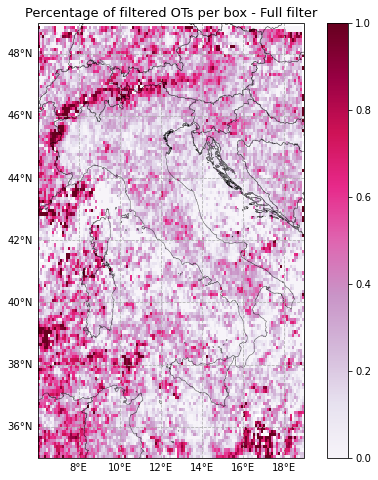

In [25]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})

perc_filtOT_countOnGrid.plot(column='perc_OT', ax=ax1, cmap='PuRd', kind='geo', zorder=1, legend=True)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax1, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_title('Percentage of filtered OTs per box - Full filter', fontsize=13);

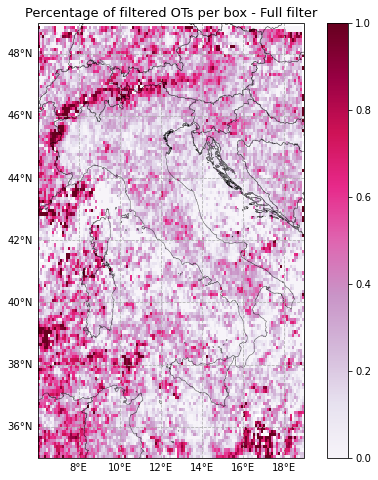

In [43]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})

perc_filtOT_countOnGrid.plot(column='perc_OT', ax=ax1, cmap='PuRd', kind='geo', zorder=1, legend=True)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax1, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_title('Percentage of filtered OTs per box - Full filter', fontsize=13);

pl.savefig(f"/home/ciccuz/phd/KIT/scripts/plots/OTfilter_percentageFilt/percOT_fullFilt.png",dpi=200, bbox_inches='tight')

- **Single params:**

In [26]:
#add columns of 1s to be summed in the spatial join with grid:
all_OTset_2016_2017_2018_params['N_OT'] = 1
filt_OTset_2016_2017_2018_K['N_OT'] = 1
filt_OTset_2016_2017_2018_LI['N_OT'] = 1
filt_OTset_2016_2017_2018_DLS['N_OT'] = 1
filt_OTset_2016_2017_2018_H0['N_OT'] = 1
filt_OTset_2016_2017_2018_CAPE['N_OT'] = 1

points_allOT_params = all_OTset_2016_2017_2018_params
points_filtOT_K = filt_OTset_2016_2017_2018_K
points_filtOT_LI = filt_OTset_2016_2017_2018_LI
points_filtOT_DLS = filt_OTset_2016_2017_2018_DLS
points_filtOT_H0 = filt_OTset_2016_2017_2018_H0
points_filtOT_CAPE = filt_OTset_2016_2017_2018_CAPE

#spatial join between points and grid
pointInPolys_allOT_params = sjoin(points_allOT_params, grid, how='left').drop(['index_right'],axis=1)
pointInPolys_filtOT_K = sjoin(points_filtOT_K, grid, how='left').drop(['index_right'],axis=1)
pointInPolys_filtOT_LI = sjoin(points_filtOT_LI, grid, how='left').drop(['index_right'],axis=1)
pointInPolys_filtOT_DLS = sjoin(points_filtOT_DLS, grid, how='left').drop(['index_right'],axis=1)
pointInPolys_filtOT_H0 = sjoin(points_filtOT_H0, grid, how='left').drop(['index_right'],axis=1)
pointInPolys_filtOT_CAPE = sjoin(points_filtOT_CAPE, grid, how='left').drop(['index_right'],axis=1)

#sum points in each grid cell
pointSumByPoly_allOT_params = pointInPolys_allOT_params.groupby('FID')['N_OT'].agg(['sum'])
pointSumByPoly_filtOT_K = pointInPolys_filtOT_K.groupby('FID')['N_OT'].agg(['sum'])
pointSumByPoly_filtOT_LI = pointInPolys_filtOT_LI.groupby('FID')['N_OT'].agg(['sum'])
pointSumByPoly_filtOT_DLS = pointInPolys_filtOT_DLS.groupby('FID')['N_OT'].agg(['sum'])
pointSumByPoly_filtOT_H0 = pointInPolys_filtOT_H0.groupby('FID')['N_OT'].agg(['sum'])
pointSumByPoly_filtOT_CAPE = pointInPolys_filtOT_CAPE.groupby('FID')['N_OT'].agg(['sum'])

#create grid with associated number of OTs for each grid:
allOT_countOnGrid_params = sfg_sp.copy()
filtOT_countOnGrid_K = sfg_sp.copy()
filtOT_countOnGrid_LI = sfg_sp.copy()
filtOT_countOnGrid_DLS = sfg_sp.copy()
filtOT_countOnGrid_H0 = sfg_sp.copy()
filtOT_countOnGrid_CAPE = sfg_sp.copy()

allOT_countOnGrid_params['N_OT'] = pointSumByPoly_allOT_params['sum']
filtOT_countOnGrid_K['N_OT'] = pointSumByPoly_filtOT_K['sum']
filtOT_countOnGrid_LI['N_OT'] = pointSumByPoly_filtOT_LI['sum']
filtOT_countOnGrid_DLS['N_OT'] = pointSumByPoly_filtOT_DLS['sum']
filtOT_countOnGrid_H0['N_OT'] = pointSumByPoly_filtOT_H0['sum']
filtOT_countOnGrid_CAPE['N_OT'] = pointSumByPoly_filtOT_CAPE['sum']

In [27]:
#set all NaNs in filtOT_countOnGrid to 0 to consider occasions when all OTs (100%) have been filtered out:
allOT_countOnGrid_params['N_OT'] = allOT_countOnGrid_params['N_OT'].replace(np.nan, 0)
filtOT_countOnGrid_K['N_OT'] = filtOT_countOnGrid_K['N_OT'].replace(np.nan, 0)
filtOT_countOnGrid_LI['N_OT'] = filtOT_countOnGrid_LI['N_OT'].replace(np.nan, 0)
filtOT_countOnGrid_DLS['N_OT'] = filtOT_countOnGrid_DLS['N_OT'].replace(np.nan, 0)
filtOT_countOnGrid_H0['N_OT'] = filtOT_countOnGrid_H0['N_OT'].replace(np.nan, 0)
filtOT_countOnGrid_CAPE['N_OT'] = filtOT_countOnGrid_CAPE['N_OT'].replace(np.nan, 0)

- K-filtered set

In [29]:
perc_filtOT_countOnGrid_K = gpd.GeoDataFrame(columns=['FID','geometry','perc_OT'])
perc_filtOT_countOnGrid_K['FID'] = allOT_countOnGrid_params['FID']
perc_filtOT_countOnGrid_K['geometry'] = allOT_countOnGrid_params['geometry']

perc_filtOT_countOnGrid_K['perc_OT'] = 1 - (filtOT_countOnGrid_K['N_OT']/allOT_countOnGrid_params['N_OT'])

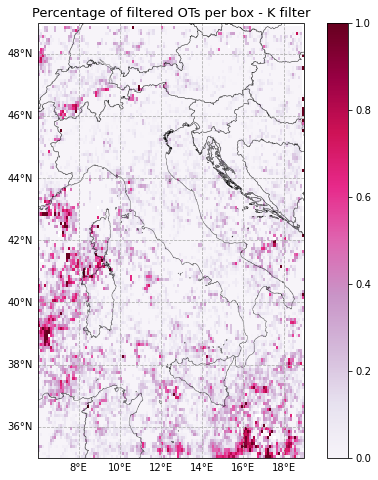

In [44]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})

perc_filtOT_countOnGrid_K.plot(column='perc_OT', ax=ax1, cmap='PuRd', kind='geo', zorder=1, legend=True)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax1, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_title('Percentage of filtered OTs per box - K filter', fontsize=13);

pl.savefig(f"/home/ciccuz/phd/KIT/scripts/plots/OTfilter_percentageFilt/percOT_K.pdf",dpi=200, bbox_inches='tight')

- LI-filtered set

In [31]:
perc_filtOT_countOnGrid_LI = gpd.GeoDataFrame(columns=['FID','geometry','perc_OT'])
perc_filtOT_countOnGrid_LI['FID'] = allOT_countOnGrid_params['FID']
perc_filtOT_countOnGrid_LI['geometry'] = allOT_countOnGrid_params['geometry']

perc_filtOT_countOnGrid_LI['perc_OT'] = 1 - (filtOT_countOnGrid_LI['N_OT']/allOT_countOnGrid_params['N_OT'])

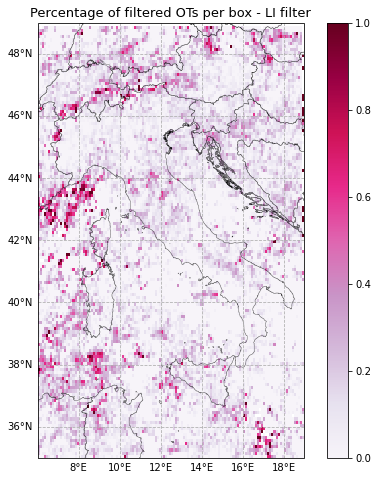

In [45]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})

perc_filtOT_countOnGrid_LI.plot(column='perc_OT', ax=ax1, cmap='PuRd', kind='geo', zorder=1, legend=True)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax1, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_title('Percentage of filtered OTs per box - LI filter', fontsize=13);

pl.savefig(f"/home/ciccuz/phd/KIT/scripts/plots/OTfilter_percentageFilt/percOT_LI.pdf",dpi=200, bbox_inches='tight')

- DLS-filtered set

In [34]:
perc_filtOT_countOnGrid_DLS = gpd.GeoDataFrame(columns=['FID','geometry','perc_OT'])
perc_filtOT_countOnGrid_DLS['FID'] = allOT_countOnGrid_params['FID']
perc_filtOT_countOnGrid_DLS['geometry'] = allOT_countOnGrid_params['geometry']

perc_filtOT_countOnGrid_DLS['perc_OT'] = 1 - (filtOT_countOnGrid_DLS['N_OT']/allOT_countOnGrid_params['N_OT'])

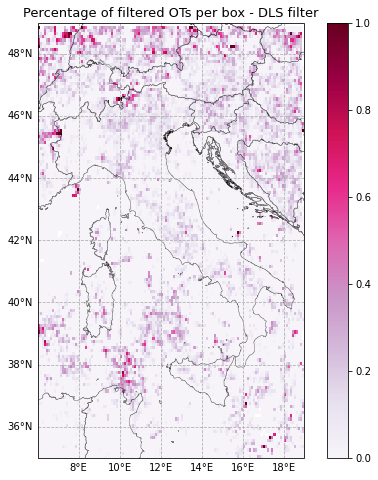

In [46]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})

perc_filtOT_countOnGrid_DLS.plot(column='perc_OT', ax=ax1, cmap='PuRd', kind='geo', zorder=1, legend=True)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax1, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_title('Percentage of filtered OTs per box - DLS filter', fontsize=13);

pl.savefig(f"/home/ciccuz/phd/KIT/scripts/plots/OTfilter_percentageFilt/percOT_DLS.pdf",dpi=200, bbox_inches='tight')

- H0-filtered set

In [36]:
perc_filtOT_countOnGrid_H0 = gpd.GeoDataFrame(columns=['FID','geometry','perc_OT'])
perc_filtOT_countOnGrid_H0['FID'] = allOT_countOnGrid_params['FID']
perc_filtOT_countOnGrid_H0['geometry'] = allOT_countOnGrid_params['geometry']

perc_filtOT_countOnGrid_H0['perc_OT'] = 1 - (filtOT_countOnGrid_H0['N_OT']/allOT_countOnGrid_params['N_OT'])

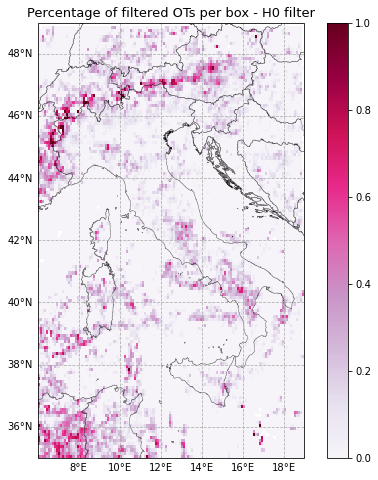

In [47]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})

perc_filtOT_countOnGrid_H0.plot(column='perc_OT', ax=ax1, cmap='PuRd', kind='geo', zorder=1, legend=True)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax1, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_title('Percentage of filtered OTs per box - H0 filter', fontsize=13);

pl.savefig(f"/home/ciccuz/phd/KIT/scripts/plots/OTfilter_percentageFilt/percOT_H0.pdf",dpi=200, bbox_inches='tight')

- CAPE-filtered set:

In [38]:
perc_filtOT_countOnGrid_CAPE = gpd.GeoDataFrame(columns=['FID','geometry','perc_OT'])
perc_filtOT_countOnGrid_CAPE['FID'] = allOT_countOnGrid_params['FID']
perc_filtOT_countOnGrid_CAPE['geometry'] = allOT_countOnGrid_params['geometry']

perc_filtOT_countOnGrid_CAPE['perc_OT'] = 1 - (filtOT_countOnGrid_CAPE['N_OT']/allOT_countOnGrid_params['N_OT'])

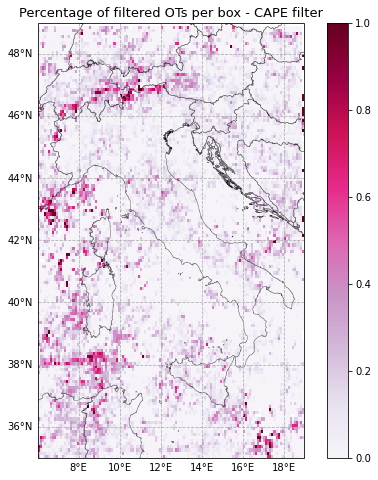

In [48]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})

perc_filtOT_countOnGrid_CAPE.plot(column='perc_OT', ax=ax1, cmap='PuRd', kind='geo', zorder=1, legend=True)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax1, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_title('Percentage of filtered OTs per box - CAPE filter', fontsize=13);

pl.savefig(f"/home/ciccuz/phd/KIT/scripts/plots/OTfilter_percentageFilt/percOT_CAPE.pdf",dpi=200, bbox_inches='tight')